## Ch 3. 시계열의 탐색적 자료 분석

### 3.2 시계열에 특화된 탐색법

**[시계열 분류 관련 개념]**

**1. 정상성(stationarity)**
* 시계열이 정상성이 된다는 의미와 정상성에 대한 통계적 검사

**2. 자체상관(self correlation)**
* 시계열 그 자체로 연관성이 있다는 의미와 이 연관성이 시계열의 내재된 역동성에 대해 보여주고자 하는 것

**3. 허위상관(spurious correlation)**
* 상관관계가 허위가 된다는 의미와 허위상관을 마주칠 만한 상황


시계열을 다룰 때, 시계열이 시스템의 '안정성'을 반영하는가 or 지속적인 변화를 반영하는가에 대한 질문을 던져봐야.

정상성, 자체상관, 허위상관의 손자대로 개념과 결과적 방법을 다룹니다.  
구체적인 내용에 뛰어들기 전에, 손자를 이렇게 정한 이유를 설명하겠습니다.  
시계열을 다룰 때 처음으로 던져볼 만한 질문은 시계열이 시스템의 '안정성'을 반영하는가 아니면 지속적인 변화를 반영하는 가에 대한 것입니다.   
정상성은 안정성의 수준을 의미하며 이를 평가하는 것도 중요합니다.  
시스템이 보여주는 과거의 장기적 행동은 미래의 장기적인 행동을 얼마나 반영하는지 알아야 하기 때문입니다.  
일단 시계열의 '안정성'(전문용어로 사용된 것은 아님)을 측정했다면, 그다음 내부적인 역학의 존재를 결정해야 합니다  
(예: 계절 변화).   
즉, 자체상관을 찾기 위한 노력입니다.   
이를 통해서 미래의 데이터 예측에 먼 과거 또는 최근의 데이터가 얼마나 밀접한 연관성을 가지는지와 같은 근본적인 질문에 답을 구해볼 수 있습니다.   
특정 행동역학을 발견했다는 생각이 들었을 때, 그 역학이 우리가 알고 싶은 인과관계에 어떠한 의미도 가지지 않는다면 결코 그 역학에 기반한 인과관계를 찾으려고 해서는 안 됩니다.   
그런 이유로 상관관계가 곧 인과관계는 아니라는 허위상관을 찾아야 합니다.  

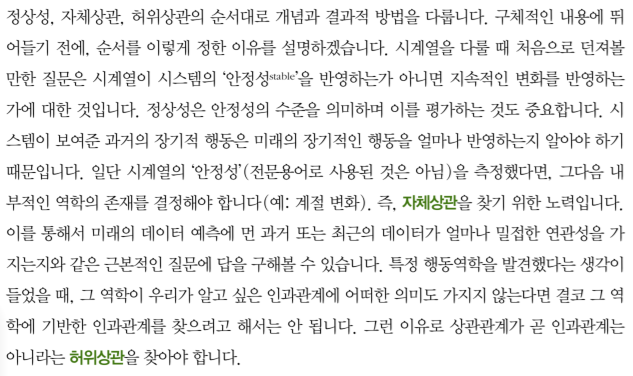

#### 3.2.1 정상성 이해하기

## Ch 11. 오차 측정

### 11.1 예측을 테스트하는 기본 방법

* **sklearn.model_selection.TimeSeriesSplit**

- 모든 모델에 대한 최적의 기준은 학습, 검증, 테스트 기간과 함께 백테스트 되어야 한다. <br><br>
- 모델이 특정 날짜의 범위나 집합에 대해 개발되었어도, 백테스트에서는 가능한 조건 및 변화에 부합하는 전체 범위의 기록에 대한 테스트 진행<br><br>
- 너무 많은 모델의 시도는 피할것 --> 과적합 위험<br><br>
- 목표에 따라서는 이례적인 기간의 데이터를 포함하지 않는게 현명할 수 있다.<br><br>
- 혹은 특정시기의 정확도를 올리고 싶다면 특정시기(겨울) 등의 가중치를 둘 수도 있다

**[테스트 방식]**

1) **확장 윈도우 방식** : 과적합 피해야 할 때


	| 학습 | 테스트 |
	|------|--------|
	| A | B |
	| A B | C |
	| A B C | D |
	| A B C D | E |
	| A B C D E | F |    

2) **이동 윈도우 방식** : 데이터가 진화된다고 생각할 때  

	| 학습 | 테스트 |
	|------|--------|
	| A | B |
	| A B | C |
	| A B C | D |
	| A B C D | E |
	| A B C D E | F |

#### 11.1.1 모델에 특화된 백테스트 고려사항

- 백테스트 구조 잡을 때, 학습될 모델의 역동성을 고려해야


- 특정기간의 데이터로 모델을 학습하는 것의 의미 고려

1) **ARIMA 같은 전통 모델**

- 모든 데이터가 모델의 파라미터를 선택할 때 균등하게 고려됨


- IF, 모델의 파라미터가 시간에 따라 달라져야한다면 모델의 성능이 떨어진다.


- 최근 데이터에 더 많은 가중치를 주는 방식의 손실함수를 직접 작성도 가능
<br><br>

2) **배치형태의 확률적 방식**

- 시간에 따라 진화하는 가중치와 추정치라는 결과를 가져올 수 있다.


- 데이터가 시간순으로 정렬된 경우, 기본적인 확률적 경사 하강법으로 훈련된 신경망 모델은 어느 정도 데이터의 시간적 특징을 설명한다.




📒  시간이 지남에 따라 모델의 스냅샷을 남겨두기

- 모델의 과거 데이터에 적합 시킨 후 롤 포워드 하여 테스트하기 때문에 모델과 타임스탬프를 함께 저장하는 방법이 필요. 


- 나중에 모델을 부를 때 해당 모델을 적절히 사용할 수 있는 가장 이른 시점을 알기 위함


- 궁극적으로 얼마나 시계열 모델이 프로덕션 환경에서 자주 재적합 되어야 하는지에 대한 리듬의 선택에 유용

### 11.2 예측하기 좋은 시점

- 데이터의 신호 대 잡음비(noise-to-signal ratio)가 높다면 모델에 대한 기대치를 제한해야

**1. 테스트 데이터셋에 대한 모델 출력 그래프 그리기**
- 모델이 만든 분포는 체제 전환이나 기본 추세의 변화가 없다는 가정하에 예측될 값의 분포와 일치해야한다


-  주가가 균등한 폭으로 오르락내리락한다는 사실을 알고 잇지만, 모델이 주가가 상승한다고만 예측한다면 해당 모델은 불충분하다. 


- 분포를 명확히 벗어나서 별다른 검증이 필요 없을 때도 있지만, 그렇지 않은 경우에는 검정 통계량을 적용하여 모델의 출력과 실제값을 비교해봐야함
<br><br>

**2. 시간에 따른 모델의 잔차 그래프 그리기**
- 시간에 따른 잔차가 균등하지 않다면 모델이 불충분할수도


- 이를 보고 시간적 행동 묘사에 필요한 추가 파라미터가 필요한지 파악
<br><br>

**3. 시간을 인식하는 간단한 널 모델에 대해 내 모델 검증하기**
- 일반적인 널 모델의 시간 t에 대한 모든 예측은 시간 t-1값이 되어야 함.


- 이를 뛰어넘을 수 없으면 모델을 정당화 할 수 없다. 


	- 다목적용으로 만든 단순 모델이 내 모델의 성능보다 뛰어나다면, 하이퍼파라미터 격자 탐색 같은 것보다 손실함수, 데이터 전처리, 모델 자체에 근본적인 문제가 있을 가능성이 높다


	- 데이터에 노이즈가 많다는 신호일 수도 있고, 모델이 의도한 목적에 쓸모가 없음을 제시할 수도 있다.
<br><br>

**4. 모델이 이상치를 다루는 방법**
- 이상치가 발생하게 된 사건에 대해서 예측 가능한 방법이 없을 가능성이 높다

- 이상치를 매우 잘 예측하는 모델은 과적합되었을 가능성이 매우 높다. 

- 대부분은 극단적 예측을 수행하는 모델을 원하지 않는다 -> 모델의 방향성에 대해 고려해야 한다. 


**5. 시간에 민감한 분석 수행하기**

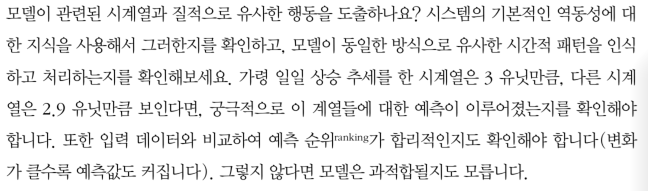

### 11.3 시뮬레이션으로 모델의 불확실성 추정

### 11.4 여러 단계를 앞선 예측

- 예측하려는 시계열값보다 보유한 시계열 데이터가 더 촘촘한 시간 해상도로 표현된 경우에 해당

한 단계 앞선 예측은 이전 장에서 다뤘지만, 여러 단계를 앞선 예측도 해볼 수 있습니다.   
특히 예측하려는 시계열값보다 보유한 시계열 데이터가 더 충분한 시간 해상도로 표현된 경우에 해당합니다.   
예를 들어 일일 주가 데이터를 가지고 있을 때 되직 저축에 대한 장기 전략으로 월간 주가를 예측할 수 있습니다.   
또 다른 예로는 매분 뇌의 활동이 측정되고 보고될 때, 환자에게 주의를 주기 위해 적어도 5분 전에 발작을 예측합니다.   
이러한 경우 여러 단계를 앞선 예측에 대한 다양한 옵션이 존재합니다.

#### 11.4.1 직접 관심 범위에 적합시키기

예측 관심 범위(horizon of interest)를 반영하는 y 값(타깃)을 설정하는 것만큼이나 간단합니다.   
데이터가 분 단위로 구성되어 있을 때, 예측은 5분을 앞선 범위에 대해 수행하고 싶다면 시간 t에 대한 모델의 입력을 잘라내고 시간 t+5까지의 데이터에 대한 레이블로 모델의 학습을 수행할 수 있습니다.   
그러면 예측하려는 데이터에 단순한 선형 회귀, 머신러닝 모델, 딥러닝 모델 등을 사용하여 적합시킬 수 있습니다.   
이는 다음과 같이 효과적으로 동작합니다.

model(X) = Y

여기서 Y는 여러분이 원하는 관심 범위를 의미합니다.  
따라서 다음은 여러분의 관심 범위에 따른 타당한 시나리오의 예입니다(첫 번째는 10단계, 두 번째는 3단계).

model₁(Xt)은 Yt+10에 적합합니다.  
model₂(Xt)은 Yt+3에 적합합니다.

#### 11.4.2 거리가 먼 시간 범위에 대한 재귀적인 접근 방법

다양한 범위에 적합되는 데 재귀적인 접근 방식을 사용하면, 모델은 하나만 만들지만 모델의 출력을 다시 입력으로 주입할 수 있습니다.   
이 방식으로 보다 먼 범위를 예측할 수 있습니다.  
바로 이 전략을 사용하여 모델링된 ARIMA로 여러 단계를 앞선 예측의 방식을 보인 바가 있으므로 이 방식의 개념은 친숙하게 다가올 것입니다.   
한 단계를 앞선 예측에 적합된 모델을 개발했다고 가정해봅시다.  
이때 학습된 모델은 model(Xt)=Yt+1 입니다.   
세 단계를 앞선 범위에 적합하고 싶다면, 다음과 같은 일을 할 수 있습니다.

model(Xt) → Yt+1의 추정치  
model(Xt 및 Yt+1의 추정치) → Yt+2의 추정치  
model(Xt 및 Yt+1과 Yt+2의 추정치) → Yt+3의 추정치

Yt+3 추정치의 예상 오차는 필연적으로 Yt+1 추정치보다 더 클 것입니다. 얼마나 더 클까요? 이는 약간 불친한 질문이 될 수도 있습니다. 이 장에서 설명했듯이, 이 질문에 대한 해답을 구하는 한 가지 좋은 옵션은 시뮬레이션을 수행해보는 것입니다.

#### 11.4.3 시계열에 적용된 멀티태스크 학습

멀티태스크 학습(multitask learning)이라는 일반적인 개념은 딥러닝에서 온 것으로, 시계열 분석에서는 특별한 의미로 적용될 수 있습니다.   
멀티태스크 학습이란 하나의 모델을 여러 가지 목적에서 활용될 수 있도록 만들거나, 서로 다르지만 연관된 대상을 한 번에 예측하는 일반화된 학습이 되도록 한다는 개념입니다.   
일부 사람들은 이를 정규화의 수단으로 생각하고, 모델에 연관된 다른 작업을 학습하도록 해서 보다 일반화되도록 합니다.  
시계열이라는 문맥에는 서로 다른 시간 범위를, 서로 다른 예측 대상으로 지정하여 멀티태스크 학습을 적용할 수 있습니다.   
이 경우에서 모델의 적합은 다음과 같을 수 있습니다.  


model(Xt)=(Yt+1, Yt+10 Yt+100)  
model(Xt)=(Yt+1, Yt+2, Yt+3)


이러한 모델을 학습할 때 손실 함수가 어떤 형태일지 생각해봐야 합니다.   
모든 예측의 가중치를 똑같게 주는 게 좋을까요?   
아니면 다른 예측 대비 특정 예측이만 특별히 가중치를 더 줄까요?  
매우 먼 미래를 예측하는 경우, 여러 범위에 대한 멀티태스크를 사용해볼 수 있습니다.   
장기 범위 예측에 유용한 중요 특징을 가진 단기 범위 예측을 모델에 포함하는 것이 가능합니다.   
낮은 신호 대 잡음비를 가진 데이터로 직접 먼 미래를 상정적으로 예측하기란 쉽지 않습니다.  
 멀티태스크 모델링이 활용되는 또 다른 시나리오로는 미래의 여러 시간 윈도우에 적합하는 상황이 있습니다.   
 모든 윈도우가 동일한 계절에 속하지만 시간상 서로 다른 시점에 있는 것입니다  
 (예: 몇 년 동안 봄만 또는 몇 주 동안 월요일만).   
 이는 계절성 및 주제에 동시 적합하는 방법이라고 볼 수 있습니다.